# Pandas4 - Visualization

In [2]:
import pandas as pd

## (1) Oslo city bike

**(1.1) Download the September 2023 city bike data here https://oslobysykkel.no/en/open-data/historical. Import the dataset.**<br> 
(The description of each column can be found on the same page.)

In [3]:
bikes_df = pd.read_csv("../dataset/09.csv")
bikes_df.head(5)

,started_at,ended_at,duration,start_station_id,start_station_name,start_station_description,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_description,end_station_latitude,end_station_longitude
0,2023-09-01 03:00:13.703000+00:00,2023-09-01 03:04:45.667000+00:00,271,2357,Aker Brygge 2 mot Rådhusplassen,ved plattform H i retning rådhuset,59.911115,10.730397,537,St. Olavs gate,ved Pilestredet,59.917968,10.738629
1,2023-09-01 03:01:13.151000+00:00,2023-09-01 03:12:47.799000+00:00,694,526,Lille Grensen,Ved Akersgata,59.913897,10.742310,408,Tøyen skole,forsiden av skolebygget,59.914943,10.773977
2,2023-09-01 03:02:47.838000+00:00,2023-09-01 03:08:53.594000+00:00,365,453,Frogner Stadion,ved hovedinngangen,59.927538,10.710263,511,Henrik Ibsens gate,ved Parkveien,59.915088,10.722280
3,2023-09-01 03:06:38.884000+00:00,2023-09-01 03:10:42.231000+00:00,243,2339,Elgsletta,langs Nylandsveien,59.915649,10.761725,2328,The Hub,Mellom Oslo City og The Hub hotel,59.912522,10.750910
4,2023-09-01 03:19:37.513000+00:00,2023-09-01 03:27:15.072000+00:00,457,598,Sofienbergparken nord,langs Helgesens gate,59.923229,10.766171,478,Jernbanetorget,Europarådets plass,59.911901,10.749929


**(1.2) Extract the date (month-date) from the column "started_at" and add it to a new column named "date".**<br>
Hint: <code>df["date"] = df.column.str[5:10]</code>

In [3]:
bikes_df["date"] = bikes_df.started_at.str[5:10]
bikes_df.head(5)

,started_at,ended_at,duration,start_station_id,start_station_name,start_station_description,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_description,end_station_latitude,end_station_longitude,date
0,2023-09-01 03:00:13.703000+00:00,2023-09-01 03:04:45.667000+00:00,271,2357,Aker Brygge 2 mot Rådhusplassen,ved plattform H i retning rådhuset,59.911115,10.730397,537,St. Olavs gate,ved Pilestredet,59.917968,10.738629,09-01
1,2023-09-01 03:01:13.151000+00:00,2023-09-01 03:12:47.799000+00:00,694,526,Lille Grensen,Ved Akersgata,59.913897,10.742310,408,Tøyen skole,forsiden av skolebygget,59.914943,10.773977,09-01
2,2023-09-01 03:02:47.838000+00:00,2023-09-01 03:08:53.594000+00:00,365,453,Frogner Stadion,ved hovedinngangen,59.927538,10.710263,511,Henrik Ibsens gate,ved Parkveien,59.915088,10.722280,09-01
3,2023-09-01 03:06:38.884000+00:00,2023-09-01 03:10:42.231000+00:00,243,2339,Elgsletta,langs Nylandsveien,59.915649,10.761725,2328,The Hub,Mellom Oslo City og The Hub hotel,59.912522,10.750910,09-01
4,2023-09-01 03:19:37.513000+00:00,2023-09-01 03:27:15.072000+00:00,457,598,Sofienbergparken nord,langs Helgesens gate,59.923229,10.766171,478,Jernbanetorget,Europarådets plass,59.911901,10.749929,09-01


**(1.3) Group the data by the column <code>date</code>. Calculate the total riding time for all trips per day.**<br>
Hint: Use column <code>duration</code> to get the riding time.

In [4]:
# solution-1
bikes_df.groupby("date").duration.sum()

date
09-01    5290311
09-02    4211967
09-03    3024306
09-04    5543577
09-05    5432563
09-06    4746013
09-07    4951538
09-08    4016794
09-09    4144263
09-10    3605407
09-11    3104244
09-12    4549744
09-13    4511032
09-14    4111887
09-15    3239836
09-16    3325643
09-17    3114463
09-18    1662267
09-19    3250629
09-20    2547614
09-21    2001956
09-22    2792952
09-23    3509155
09-24    2829241
09-25    3155826
09-26    3857809
09-27    3160614
09-28    2858428
09-29    3349489
09-30    2884624
Name: duration, dtype: int64

In [5]:
# solution-2
bikes_df.pivot_table(index = "date", values = "duration", aggfunc= "sum")

,duration
date,
09-01,5290311
09-02,4211967
09-03,3024306
09-04,5543577
09-05,5432563
09-06,4746013
09-07,4951538
09-08,4016794
09-09,4144263


**(1.4) Use a line chart to display the result obtained in (1.3). Answer the following question based on the line chart and write your answers in the markdown cell**<br>
Setting: Use marker = "o" and figsize = (12,4).

<Axes: xlabel='date'>

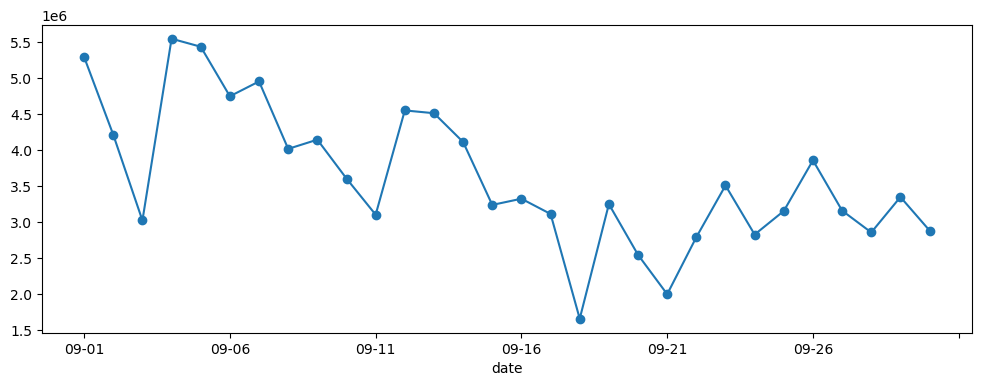

In [6]:
bikes_df.groupby("date").duration.sum().plot(marker = "o", figsize = (12,4))

- **Question:** Is the total riding time in September showing an increasing or decreasing trend?<br>
- **Answer:** Decreasing trend.

## (2) Customer profile analysis
A mall has gathered data on their customers through a loyalty program. They have information about age, gender, annual income and spending score. Spending Score is a measure from 0 to 100, created for each customer based on customer behavior and purchasing data.

**(2.1) Import dataset <code>customers.csv</code> and use the column <code>CustomerID</code> as the index. Display the first five rows.**<br>
Hint: <code>index_col = "CustomerID"</code> or <code>index_col = [0]</code>.

In [7]:
customer_df = pd.read_csv("../dataset/customers.csv", index_col = [0])
customer_df.head(5)

,Gender,Age,Annual Income (k$),Spending Score (1-100)
CustomerID,,,,
1,Male,19,15,39
2,Male,21,15,81
3,Female,20,16,6
4,Female,23,16,77
5,Female,31,17,40


**(2.2) Rename the columns according to the table below.**<br>

|column name| new column name|
|:-:|:-:|
|Gender|gender|
|Age|age|
|Annual Income (k$)|income|
|Spending Score (1-100)|spending_score|

In [8]:
customer_df.columns = ['gender', 'age', 'income', 'spending_score']

**(2.3) Use a histogram to show the income distribution.**

<Axes: ylabel='Frequency'>

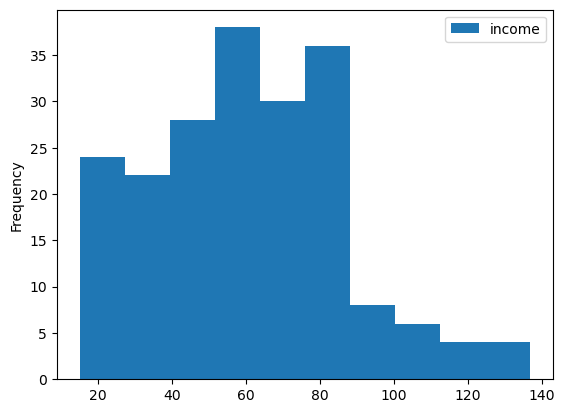

In [9]:
# solution-1
customer_df.plot(kind = "hist", y = "income")

<Axes: ylabel='Frequency'>

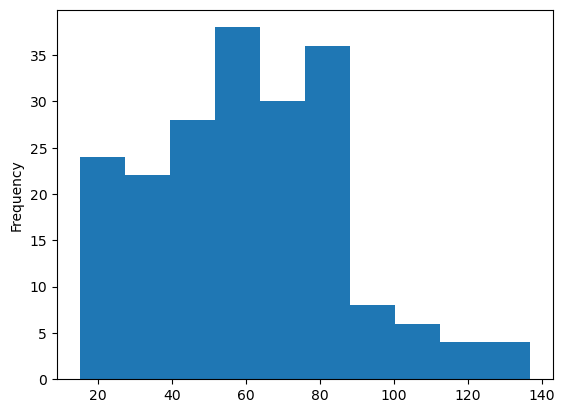

In [10]:
# solution-2
customer_df.income.plot(kind = "hist")

**(2.4) Use a scatter plot to show the relationship between income and spending_score.**

<Axes: xlabel='income', ylabel='spending_score'>

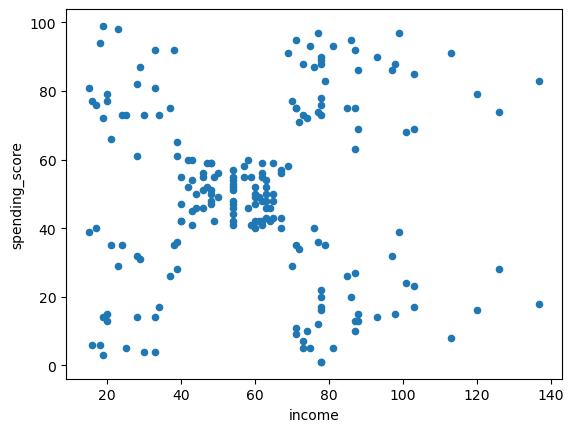

In [11]:
customer_df.plot(kind = "scatter", x= "income", y = "spending_score")

**(2.5) Use a scatter plot to show the relationship between income and spending_score, where the points are color-coded based on the <code>age</code> of customers. Answer the following question in a markdown cell.**

<Axes: xlabel='income', ylabel='spending_score'>

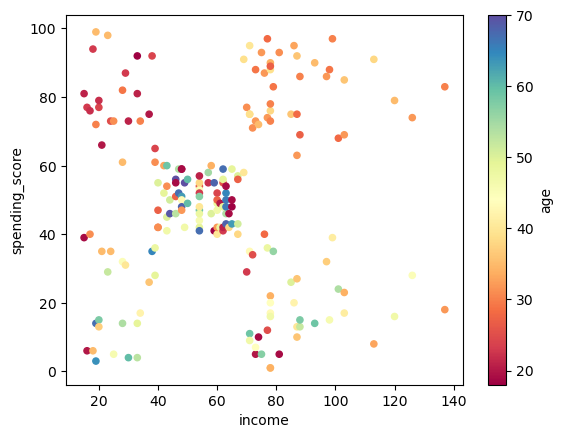

In [12]:
customer_df.plot(kind = "scatter", x= "income", y = "spending_score", c = "age", colormap = "Spectral")

- **Question:** Based on the scatter plot, would you define a customer group with an income below 40 and a spending score above 60 as young or old?<br>
- **Answer:** Young

**(2.6) Convert the age to age group according to the table below. Store the result in a new column named <code>age_group</code>.**<br>

|range| label|
|:-:|:-:|
|18-35| young adults|
|36-55| middle-aged adults|
|56-75| older adults |

In [13]:
customer_df["age_group"] = pd.cut(customer_df.age, 
                                  bins = [18,35,55,75],
                                  labels = ["young adults","middle-aged adults","older adults"], 
                                  include_lowest = True)

**(2.7) Count the number of customers in each age group. Display the results with a horizontal bar graph.**

<Axes: >

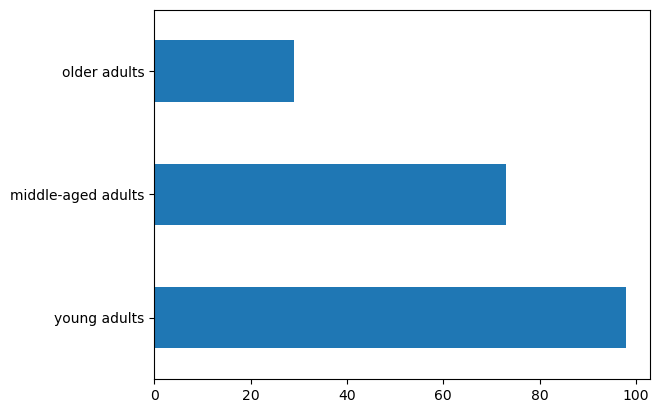

In [14]:
#solution-1
customer_df.age_group.value_counts().plot(kind = "barh")

<Axes: ylabel='age_group'>

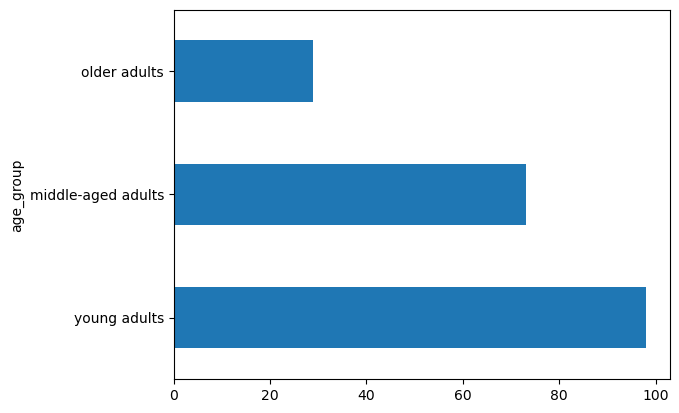

In [15]:
#solution-2
customer_df.groupby("age_group").size().plot(kind = "barh")

**(2.8) Group the data by columns <code>age_group</code> and <code>gender</code>. Count the number of customers in each group. Store the result in a dataframe called <code>customer_df_wide</code> in the following format.**

||Female|Male|
|:-:|:-:|:-:|
|**young adults**|57|...|
|**middle-aged adults**|...|...|
|**older adults**|...|...|

In [16]:
# solution-1  
# Without specifying "values" and "aggfunc", the method "crosstab" will calculate the frequency
customer_df_wide = pd.crosstab(index = customer_df["age_group"], 
                               columns = customer_df["gender"])
customer_df_wide

gender,Female,Male
age_group,,
young adults,57,41
middle-aged adults,44,29
older adults,11,18


In [17]:
# solution-2 
# If "aggfunc = "count", you can use any column for the argument "values"
customer_df_wide = customer_df.pivot_table(index = "age_group", 
                                           columns = "gender", 
                                           values = "spending_score", 
                                           aggfunc = "count")
customer_df_wide

gender,Female,Male
age_group,,
young adults,57,41
middle-aged adults,44,29
older adults,11,18


**(2.9) Draw a stacked horizontal bar chart to show the number of customers in each age group. Each bar is stacked by two sub-bars: the number of male customers and the number of female customers.** 

<Axes: ylabel='age_group'>

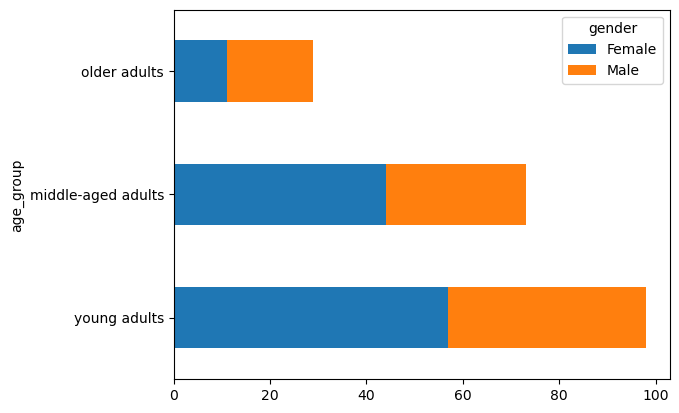

In [18]:
customer_df_wide.plot(kind = "barh", stacked = True)

## (3) Wine dataset
Description of each column
- **country**: The country that the wine is from
- **description**: A few sentences from a sommelier describing the wine's taste, smell, look, feel, etc.
- **designation**: The vineyard within the winery where the grapes that made the wine are from
- **points**: The number of points WineEnthusiast rated the wine on a scale of 1-100
- **price**: The cost for a bottle of the wine
- **province**: The province or state that the wine is from
- **region_1**: The wine growing area in a province or state
- **region_2**: Sometimes there are more specific regions specified within a wine growing area, but this value can sometimes be blank
- **variety**: The type of grapes used to make the wine
- **winery**: The winery that made the wine

**(3.1) Import dataset <code>wine.csv</code> and set the first column as the index.** 

In [19]:
wine_raw_df = pd.read_csv("../dataset/wine.csv", index_col = [0])

**(3.2) Shows the top five grape types most commonly used to produce wine.**<br>
Hint: Calculate the frequency of each category in the <code>variety</code> column.

In [20]:
# solution-1
wine_raw_df.variety.value_counts().head(5)

Chardonnay                  14482
Pinot Noir                  14291
Cabernet Sauvignon          12800
Red Blend                   10062
Bordeaux-style Red Blend     7347
Name: variety, dtype: int64

In [21]:
# solution-2
wine_raw_df.groupby("variety").size().sort_values(ascending = False).head(5)

variety
Chardonnay                  14482
Pinot Noir                  14291
Cabernet Sauvignon          12800
Red Blend                   10062
Bordeaux-style Red Blend     7347
dtype: int64

**(3.3) Display the result obtained in (3.2) with a pie chart.**

<Axes: ylabel='variety'>

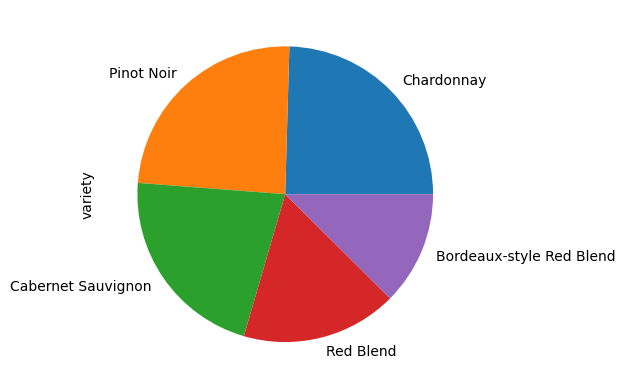

In [22]:
wine_raw_df.variety.value_counts().head(5).plot(kind = "pie")

**(3.4) Select a subset that meets all of the following criteria. Use this subset to solve the following tasks.**<br>
- Produced in Spain, Italy or France.
- The price is less than 200.
- Made from the following grape varieties: Chardonnay, Pinot Noir, Cabernet Sauvignon.

In [23]:
wine_df = wine_raw_df[(wine_raw_df.country.isin(["Spain","Italy","France"])
                       &(wine_raw_df.price<200)
                       &(wine_raw_df.variety.isin(["Chardonnay", "Pinot Noir", "Cabernet Sauvignon"])))]
wine_df.head(5)

,country,description,designation,points,price,province,region_1,region_2,variety,winery
51,France,"This structured, complex Chardonnay is packed ...",NaN,90,68.0,Burgundy,Chassagne-Montrachet,NaN,Chardonnay,Chartron et Trébuchet
53,France,"With its light color and cool feel, this well-...",L'Inédit,90,28.0,Loire Valley,Coteaux du Giennois,NaN,Pinot Noir,Clement et Florian Berthier
63,France,L'Homme Mort is a northern extension of the Fo...,L'Homme Mort Premier Cru,91,45.0,Burgundy,Chablis,NaN,Chardonnay,Domaine Chenevières
66,France,The steely character of a young Chablis is ver...,Fourchaume Premier Cru,91,38.0,Burgundy,Chablis,NaN,Chardonnay,Louis Max
76,France,"This wine is bone-dry, although with some age ...",Le Nombre d'Or Brut Nature,91,85.0,Champagne,Champagne,NaN,Chardonnay,Aubry


**(3.5) Export the subset obtaind in (3.4) as a csv file.**<br>
Hint: You can search online for "how to export dataframe to csv in python".
        

In [24]:
wine_df.to_csv("wine_subset.csv")

**(3.6) For those wines made from the grape variety "Pinot Noir", use a histogram to show their distribution of <code>point</code>. Answer the following question in a markdown cell.**

<Axes: ylabel='Frequency'>

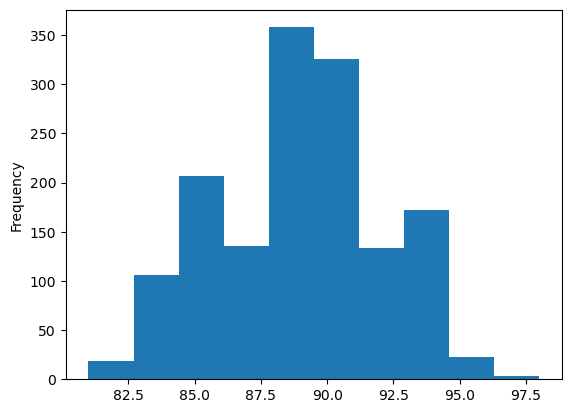

In [25]:
wine_df[wine_df.variety == "Pinot Noir"].points.plot(kind = "hist")

- **Question:** Based on the distribution of points, which of the following ranges do most wines fall into? [80-83], [84-87], [88-91], [92-95]<br>
- **Answer:** 88-91

**(3.7) Use a horizontal bar chart to display the average price for each grape variety.**

<Axes: ylabel='variety'>

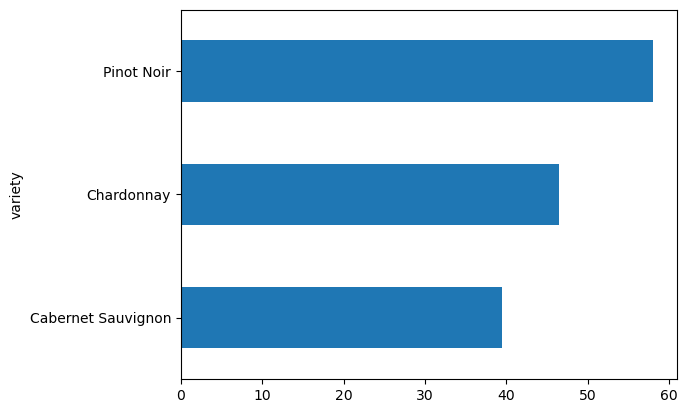

In [26]:
# solution-1
wine_df.groupby("variety").price.mean().plot(kind = "barh")

<Axes: ylabel='variety'>

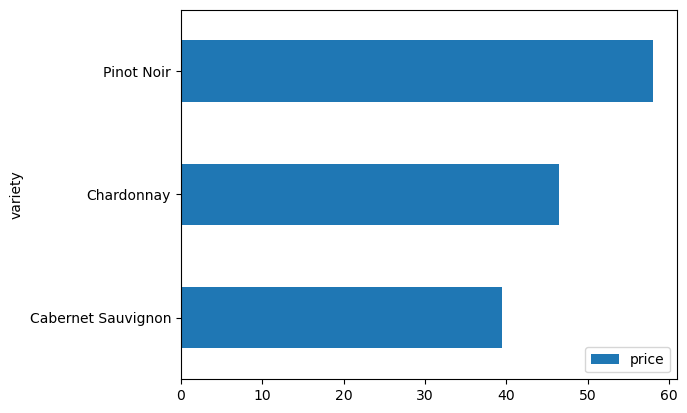

In [27]:
# solution-2
wine_df.pivot_table(index = "variety", values = "price", aggfunc = "mean").plot(kind = "barh", y = "price")

**(3.8) Calculate the average price of each grape variety in each country.**

In [28]:
# solution-1
wine_df.groupby(["country", "variety"]).price.mean()

country  variety           
France   Cabernet Sauvignon    11.477273
         Chardonnay            50.222074
         Pinot Noir            59.107192
Italy    Cabernet Sauvignon    48.612150
         Chardonnay            32.188889
         Pinot Noir            15.714286
Spain    Cabernet Sauvignon    29.770270
         Chardonnay            15.626866
         Pinot Noir            18.483871
Name: price, dtype: float64

In [29]:
# solution-2
wine_df.pivot_table(index = "country", columns ="variety", values = "price", aggfunc = "mean")

variety,Cabernet Sauvignon,Chardonnay,Pinot Noir
country,,,
France,11.477273,50.222074,59.107192
Italy,48.612150,32.188889,15.714286
Spain,29.770270,15.626866,18.483871


**(3.9) Use a horizontal bar chart to display the result obtained in (3.8).**<br>
Hint: Use "country" as the ylable, and use different colored bars to represent the varieties.

<Axes: ylabel='country'>

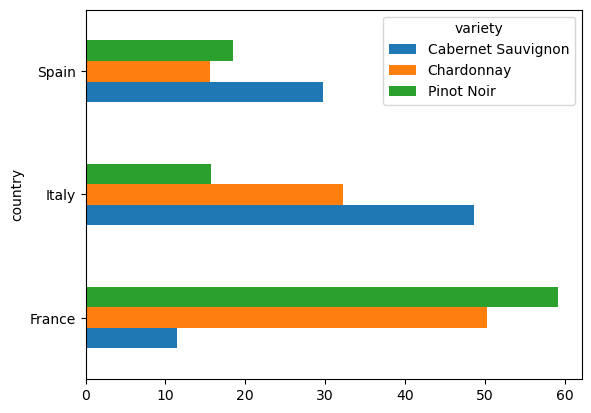

In [30]:
#solution-1
wine_df.groupby(["country", "variety"]).price.mean().unstack().plot(kind = "barh")

<Axes: ylabel='country'>

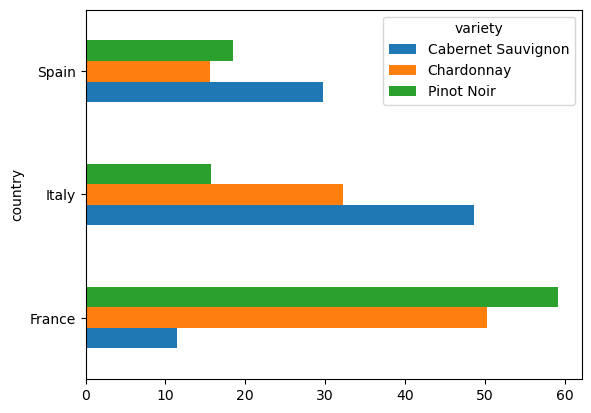

In [31]:
#solution-2
wine_df.pivot_table(index = "country", columns ="variety", values = "price", aggfunc = "mean").plot(kind = "barh")